<a href="https://colab.research.google.com/github/snad0/Comment-toxicity-Detection/blob/main/Comment_Toxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:

dataset= pd.read_csv("/content/drive/MyDrive/train.csv")

In [3]:
from tensorflow.keras.layers import TextVectorization

In [4]:
X=dataset["comment_text"]
Y=dataset[dataset.columns[2:]].values

In [5]:
vectorize=TextVectorization(max_tokens=200000,output_sequence_length=1800,
                           output_mode="int")

In [9]:
vectorize.adapt(X.values)

In [10]:
vectorized_text=vectorize(X.values)

In [11]:
data = tf.data.Dataset.from_tensor_slices((vectorized_text,Y))
data=data.cache()
data=data.shuffle(160000)
data=data.batch(16)
data=data.prefetch(8)

In [12]:
batch_X, batch_Y = data.as_numpy_iterator().next()

In [14]:
#Partition the dataset
train = data.take(int(len(data)*.7))
val=  data.skip(int(len(data)*.7)).take(int(len(data)*.2))
test = data.skip(int(len(data)*.9)).take(int(len(data)*.1))

In [15]:
train_generator= train.as_numpy_iterator()

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [17]:
model= Sequential()
# model.add(Embedded(Max_Number of words+1,32))
model.add(Embedding(200000+1,32))

model.add(Bidirectional (LSTM(32,activation='tanh')))


model.add(Dense(128, activation ='relu'))
model.add(Dense(256, activation ='relu'))
model.add(Dense(128, activation ='relu'))

#final layer for classification
model.add(Dense(6, activation ='sigmoid'))

In [18]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [67]:
history= model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
6981/6981 [==============================] - 644s 92ms/step - loss: 0.0462 - val_loss: 0.0395
Epoch 2/10
6981/6981 [==============================] - 627s 90ms/step - loss: 0.0404 - val_loss: 0.0368
Epoch 3/10
6981/6981 [==============================] - 630s 90ms/step - loss: 0.0357 - val_loss: 0.0312
Epoch 4/10
6981/6981 [==============================] - 615s 88ms/step - loss: 0.0322 - val_loss: 0.0284
Epoch 5/10
6981/6981 [==============================] - 614s 88ms/step - loss: 0.0290 - val_loss: 0.0254
Epoch 6/10
6981/6981 [==============================] - 618s 88ms/step - loss: 0.0259 - val_loss: 0.0230
Epoch 7/10
6981/6981 [==============================] - 618s 89ms/step - loss: 0.0235 - val_loss: 0.0197
Epoch 8/10
6981/6981 [==============================] - 614s 88ms/step - loss: 0.0206 - val_loss: 0.0180
Epoch 9/10
6981/6981 [==============================] - 615s 88ms/step - loss: 0.0182 - val_loss: 0.0147
Epoch 10/10
6981/6981 [==============================] 

In [68]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

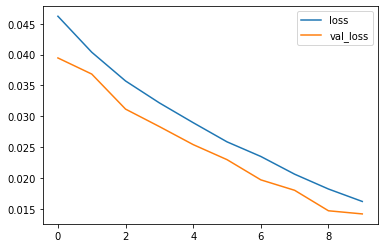

In [69]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

**MAKE PREDICTIONS**

In [70]:
batch= test.as_numpy_iterator().next()

In [71]:
input_text=vectorize("Hi stupid bro i will kill you murder you tonight i am comming to fuck you")

res= model.predict(np.expand_dims(input_text, 0))

In [72]:
print(res)

[[0.99940526 0.4841782  0.99181026 0.36270186 0.9415534  0.41706517]]


In [73]:
batch= test.as_numpy_iterator().next()
test_batch_X, test_batch_Y = batch

In [74]:
model.predict(test_batch_X)

array([[9.99944925e-01, 4.60563511e-01, 9.99491334e-01, 8.36454611e-03,
        9.65211868e-01, 1.40233524e-02],
       [7.32109617e-09, 0.00000000e+00, 1.74235457e-14, 1.20112861e-23,
        7.73409532e-16, 7.70003175e-17],
       [9.88282373e-11, 0.00000000e+00, 2.98894402e-17, 2.60701589e-30,
        4.51710563e-19, 2.49258389e-20],
       [4.38257965e-04, 7.05700829e-23, 5.59122157e-07, 7.99504352e-10,
        3.16385893e-07, 2.66961244e-08],
       [1.13734768e-06, 2.28014389e-36, 7.80082804e-11, 3.32372923e-16,
        1.42696662e-11, 5.52734074e-12],
       [6.57951459e-04, 1.47164367e-21, 1.35064249e-06, 1.91280769e-09,
        6.14279315e-07, 6.31925232e-08],
       [1.36188130e-10, 0.00000000e+00, 3.80653165e-17, 1.52727605e-28,
        1.62872677e-19, 1.04957660e-20],
       [9.00935352e-01, 3.20562758e-02, 7.88163424e-01, 1.54299904e-02,
        8.17417502e-01, 2.86829844e-02],
       [9.99961615e-01, 6.00581288e-01, 9.99406457e-01, 5.62452190e-02,
        9.73808229e-01, 

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [75]:
rs= model.predict(batch_X)

In [76]:
rs.flatten()
#converts it into one big array

array([9.43367839e-01, 2.11163933e-04, 5.60541544e-03, 5.48489974e-04,
       4.14421298e-02, 5.96015714e-04, 3.24794982e-08, 0.00000000e+00,
       2.40467721e-13, 1.42704095e-21, 4.51714920e-15, 3.73262379e-16,
       1.02704663e-08, 0.00000000e+00, 8.53152676e-15, 2.38673590e-22,
       3.37492416e-16, 1.18302987e-16, 4.76594520e-04, 2.14354203e-21,
       1.33438266e-06, 9.24375954e-09, 1.25436054e-06, 3.57135946e-07,
       3.13890602e-09, 0.00000000e+00, 1.96364938e-15, 1.18811684e-25,
       2.82466595e-17, 1.89631776e-18, 1.09503482e-07, 0.00000000e+00,
       7.79192791e-13, 1.42761952e-19, 4.41956211e-14, 7.81574919e-15,
       1.31495378e-03, 1.03167834e-19, 3.75611853e-06, 3.34981749e-08,
       4.21875575e-06, 4.66885297e-07, 9.67339218e-01, 1.32602829e-04,
       1.49268927e-02, 7.67008532e-05, 1.95715670e-02, 4.31390545e-05,
       2.92214991e-05, 2.47126206e-28, 1.23542154e-08, 8.35283584e-14,
       4.82727858e-09, 1.38394074e-09, 8.31010594e-10, 0.00000000e+00,
      

**E**valuation

In [34]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [77]:
pre= Precision()
re = Recall()
acc= CategoricalAccuracy() 

In [78]:
for batch in test.as_numpy_iterator():
  X_true,Y_true= batch
  #make prediction
  yhat= model.predict(X_true)

#flatten the prediction
  Y_true= Y_true.flatten()
  yhat=yhat.flatten()


  pre.update_state(Y_true, yhat)
  re.update_state(Y_true, yhat)
  acc.update_state(Y_true, yhat)
  


In [79]:
print(f"Precissiion: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precissiion: 0.9187554121017456, Recall: 0.9330017566680908, Accuracy: 0.5135406255722046


In [40]:
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 2.4 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
     |████████████████████████████████| 212 kB 68.8 MB/s 
     |████████████████████████████████| 2.3 MB 46.3 MB/s 
     |████████████████████████████████| 272 kB 65.6 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 61.9 MB/s 
     |████████████████████████████████| 57 kB 6.2 MB/s 
     |████████████████████████████████| 140 kB 71.0 MB/s 
     |████████████████████████████████| 144 kB 69.9 MB/s 
     |████████████████████████████████| 94 kB 4.3 MB/s 
     |████████████████████████████████| 271 kB 69.6 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 80 kB 10.6 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 856 k

In [41]:
import gradio as gr

In [85]:
import os
paths = {
    'CHECKPOINT_PATH': os.path.join('models'),
 }

In [86]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [87]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [88]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1/assets


INFO:tensorflow:Assets written to: models/1/assets


In [89]:
model.save("toxicity.h5")

In [57]:
import tensorflow as tf
model=tf.keras.models.load_model("toxicity.h5")

In [80]:
def score_comment(comment):
  vectorized_comment=vectorize([comment])
  results= model.predict(vectorized_comment)

  text=''
  for idx, col in enumerate(dataset.columns[2:]):
    text += '{}: {}\n'.format(col, results[0][idx]>0.5)
  return text


In [81]:
interface=gr.Interface(fn=score_comment, inputs=gr.inputs.Textbox(lines=2,placeholder='Commebnt to check'),
                       outputs='text')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [82]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://24500.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f17c4aae990>,
 'http://127.0.0.1:7861/',
 'https://24500.gradio.app')